# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Santiago, Santiago Metropolitan, Chile**, or **Chile** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Santiago, Santiago Metropolitan, Chile** to Ann Arbor, USA. In that case at least one source file must be about **Santiago, Santiago Metropolitan, Chile**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Santiago, Santiago Metropolitan, Chile** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## 1 Region and Domain

I am going to study the air temperature (Celsius degrees) and pollution (PM 2.5) in two regions:
* Ann Arbor, MI, United States
* Santiago, RM, Chile.

The observated field is weather and pollution.

## 2 Research Question

The cities are in opposite hemispheres, therefore, the seasons are different at same time.

The main idea is find a relationship between pollution and weather. To do this, I do the following analysis

* Compare extreme temperatures  between cities
* What city has more pollution (measured by PM 2.5). 

The intuitive hypothesis is the weather and pollution in Santiago is more extreme than Ann Arbor, and there are not relationship between the variables

## Datasets

* Air Temperature and pollution in Santiago, Chile [Parque O'higgins Station](https://sinca.mma.gob.cl/index.php/estacion/index/id/273)
* Pollution in Ann Arbor, MI, USA [Pollutant: PM2.5](https://www.epa.gov/outdoor-air-quality-data/air-data-tile-plot)
* Air temperature in Ann Arbor [Ann Arbor Station: 72537404889](https://www.ncei.noaa.gov/data/global-hourly/access/2019/)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
plt.style.use('tableau-colorblind10')
#PollutionData

#Santiago
clPM = pd.read_csv('data/assignment/PM25_CL19.csv', delimiter=';')
clPM.columns=['Date', 'Hour', 'PM25Val', 'PM25Pre', 'PM25NotVal', 'Unnamed']
#clPM.head
#clPM.describe()

#clPM['PM25Val'].isnull().sum()

#b =clPM[clPM['PM25Val'].isnull()].index
#clPM[clPM['PM25Val'].isnull()]

clPM['PM25Val'].fillna(clPM['PM25NotVal'], inplace=True)
#clPM['PM25Val'].isnull().sum()

clPM["PM25Val"].fillna(method ='ffill', inplace = True) 
#clPM['PM25Val'].isnull().sum()

#clPM.loc[b]
clPM['Date'] = pd.to_datetime(clPM.Date, format='%y%m%d')

PMSan = clPM[clPM['Date'].dt.year==2019]
PMSan = PMSan[['Date', 'PM25Val']]
PMSan.columns=['Date', 'PM25RM']
PMSan.set_index(['Date'], inplace=True)
PMSan

,PM25RM
Date,
2019-01-01,23.0
2019-01-02,21.0
2019-01-03,29.0
2019-01-04,30.0
2019-01-05,26.0
...,...
2019-12-27,15.0
2019-12-28,16.0
2019-12-29,12.0


In [3]:
usPM = pd.read_csv('data/assignment/PM25_US19.csv', delimiter=',')
usPM.columns

b =usPM.set_index('Date').groupby(level=0).agg({'Daily Mean PM2.5 Concentration': ['max']})
b.columns = b.columns.droplevel(0)
b = b.reset_index()

b['Date'] = pd.to_datetime(b.Date)

b.columns=['Date','PM25MI']
b = b.set_index('Date')
b

,PM25MI
Date,
2019-01-01,6.7
2019-01-02,8.2
2019-01-03,8.6
2019-01-04,3.0
2019-01-05,15.8
...,...
2019-12-27,9.9
2019-12-28,16.5
2019-12-29,15.7


In [4]:
##merge both databases
pm25 = pd.merge(PMSan, b, how='left', on='Date')
#pm25

pm25.head
pm25.describe()

pm25.isnull().any()
pm25['PM25MI'].isnull().sum()
pm25[pm25['PM25MI'].isnull()]

pm25["PM25MI"].fillna(method ='ffill', inplace = True) 
pm25['PM25MI'].isnull().sum()
#fill in with last date
#clPM[clPM['PM25Val'].isnull()]
#pd.concat([spain_air, usa_air], axis=0)

0

<IPython.core.display.Javascript object>


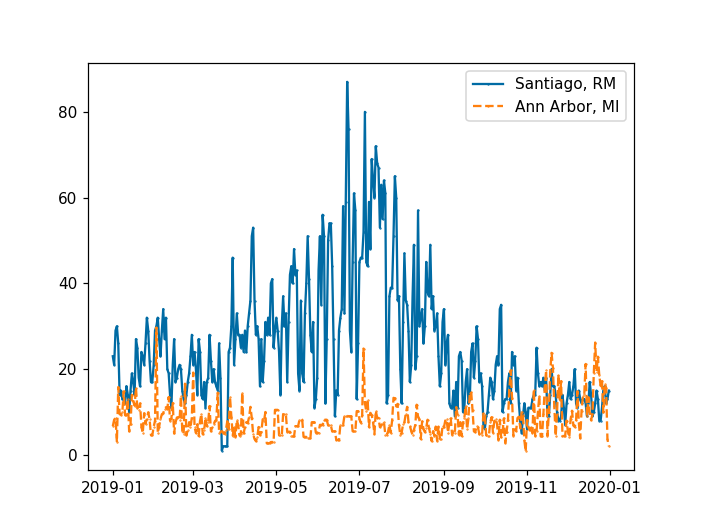

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('tableau-colorblind10')
%matplotlib notebook

f, ax = plt.subplots(1, 1)

ax.plot_date(pm25.index, pm25['PM25RM'], label='Santiago, RM', linestyle="-", markersize=0.5)
ax.plot_date(pm25.index, pm25['PM25MI'], label='Ann Arbor, MI', linestyle="--", markersize=0.5)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


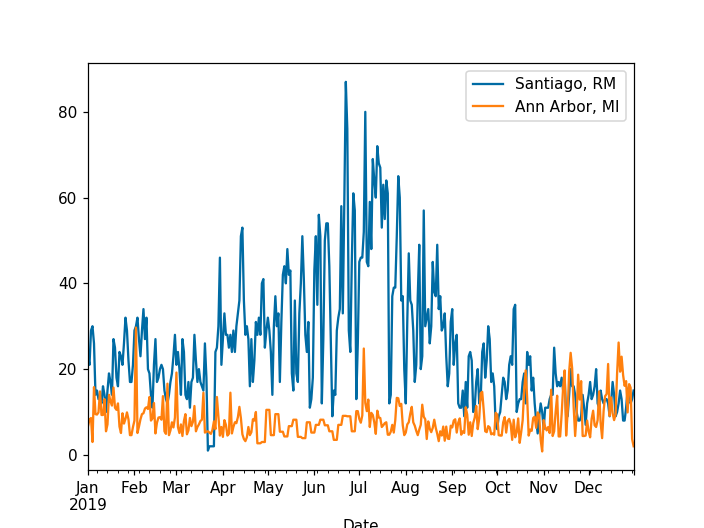

<IPython.core.display.Javascript object>


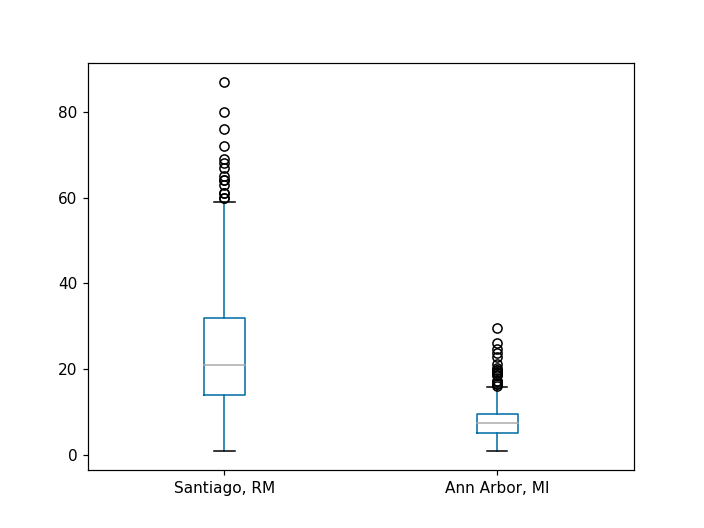

In [6]:
fig, ax = plt.subplots()
pm25.plot(kind='line', ax=ax)
ax.legend(['Santiago, RM','Ann Arbor, MI'])
plt.show()

pm25_2 = pm25.copy()
pm25_2.columns = ['Santiago, RM', 'Ann Arbor, MI']

fig, ax = plt.subplots()
pm25_2.plot(kind='box', ax=ax)
plt.show()


<IPython.core.display.Javascript object>


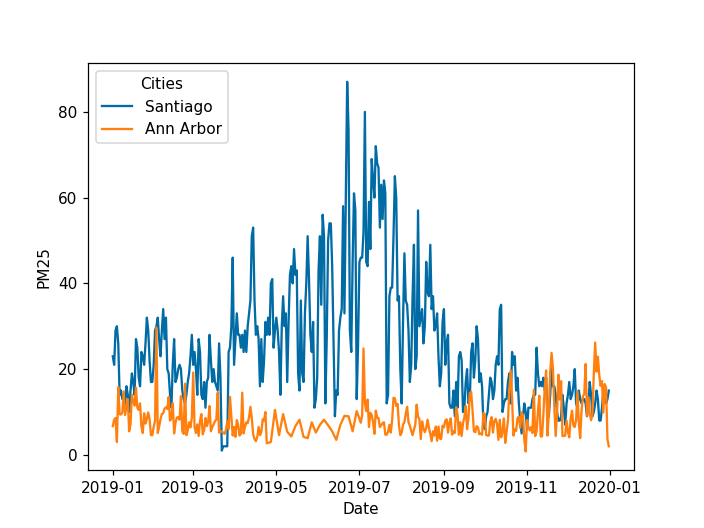

<IPython.core.display.Javascript object>


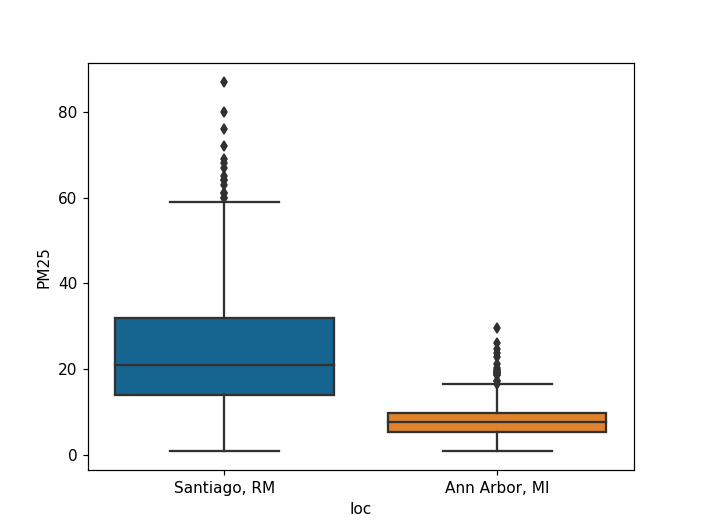

In [7]:
#use seaborn
PMSan2 = PMSan.reset_index()
PMSan2.columns=['Date','PM25']
PMSan2['loc']='Santiago, RM'
b2 = b.reset_index()
b2.columns=['Date','PM25']
b2['loc']='Ann Arbor, MI'

pm25_2 = pd.concat([PMSan2, b2])#, how='left', on='Date')
pm25_2

plt.figure()
g = sns.lineplot(x='Date', y='PM25', hue="loc", data=pm25_2, legend=False)
plt.legend(title='Cities', loc='upper left', labels=['Santiago', 'Ann Arbor'])
plt.show()

plt.figure()
m = sns.boxplot(x='loc', y='PM25', data=pm25_2)#hue="loc",, legend=False)
#plt.legend(title='Cities', loc='upper left', labels=['Santiago', 'Ann Arbor'])
plt.show()

<IPython.core.display.Javascript object>


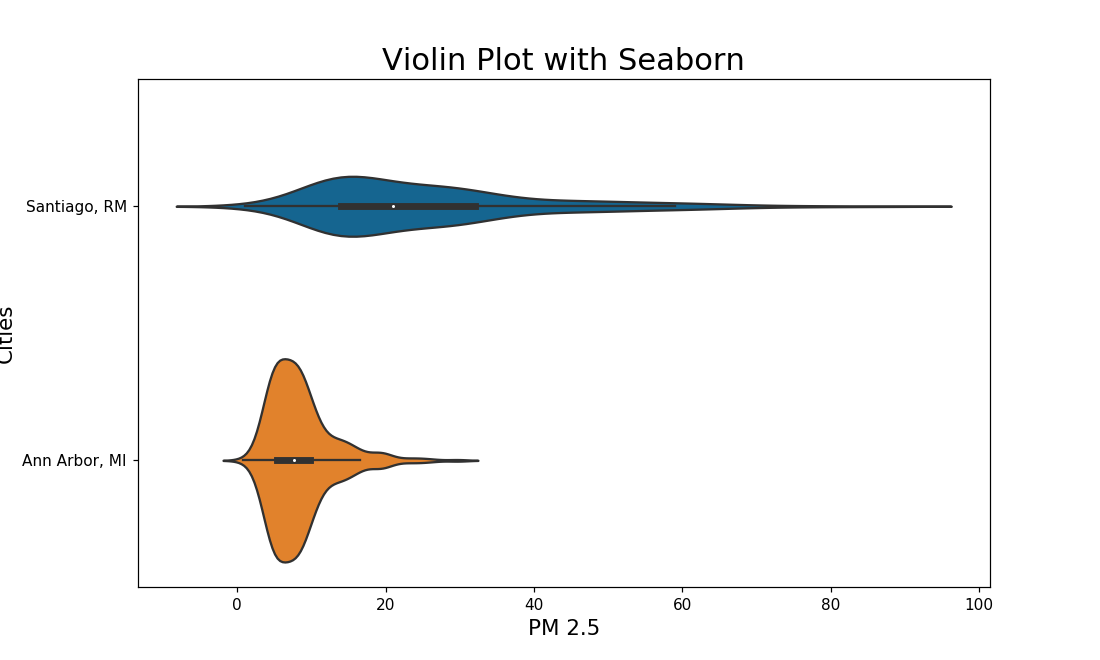

In [8]:
plt.figure(figsize=(10,6))
# horizontal violinplot with catplot seaborn
vio_plot=sns.violinplot(y="loc", x="PM25", data=pm25_2)
plt.ylabel("Cities", size=14)
plt.xlabel("PM 2.5", size=14)
plt.title("Violin Plot with Seaborn", size=20)
#plt.savefig("violin_plot_with_Seaborn_Python.png")
plt.show()

<IPython.core.display.Javascript object>


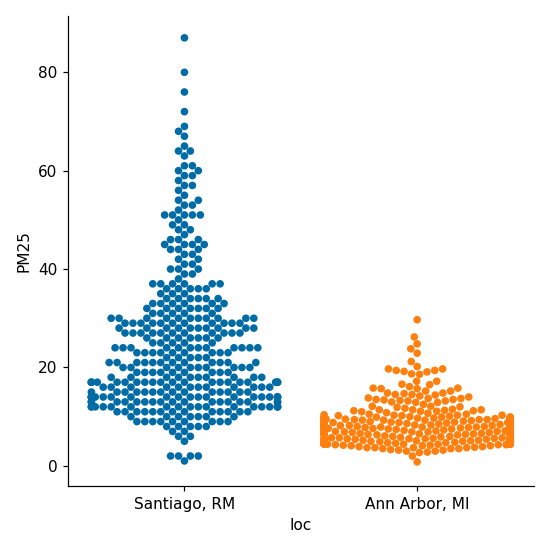

In [9]:
m = sns.catplot(x='loc', y='PM25', kind="swarm", data=pm25_2) 
#“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.
plt.show()

In [11]:
#temperature01
clTemp = pd.read_csv('data/assignment/TEMP_CL19.csv', delimiter=';', decimal=',')


clTemp.columns=['Date', 'Hour', 'Temp', 'Temp02']
clTemp.head
clTemp.describe()

clTemp['Temp'].isnull().sum()

#b =clTemp[clTemp['Temp'].isnull()].index
#clTemp[clTemp['Temp'].isnull()]


b2 = clTemp.dropna(subset=['Temp'])
#b2['Temp'] =b2['Temp'].replace(',', '.')

#b2.describe()


clTemp =b2.set_index('Date').groupby(level=0).agg({'Temp': ['min','mean','max']})
clTemp

clTemp.columns = clTemp.columns.droplevel(0)
clTemp = clTemp.reset_index()


clTemp['Date'] = pd.to_datetime(clTemp.Date, format='%y%m%d')

clTemp.columns=['Date','TminRM','TavgRM','TmaxRM']
clTemp = clTemp.set_index('Date')
clTemp


,TminRM,TavgRM,TmaxRM
Date,,,
2019-01-01,14.2250,23.799274,31.8083
2019-01-02,15.7333,24.181487,31.5500
2019-01-03,15.3083,24.870946,33.5364
2019-01-04,15.7083,23.410133,29.9583
2019-01-05,14.6167,20.332983,26.9750
...,...,...,...
2019-12-27,15.4178,24.038512,31.9750
2019-12-28,15.5920,25.198242,34.0808
2019-12-29,17.1166,25.244975,32.9833


In [12]:
#temperature01
usTemp = pd.read_csv('data/assignment/TEMP_US19.csv', delimiter=',')#, decimal=',')
#usTemp.columns
usTemp2 = usTemp.copy()
usTemp2=usTemp2[['DATE','TMP']]

usTemp2['Date'] = usTemp2.apply(lambda x: x['DATE'][0:10],axis=1)
usTemp2['Temp1'] = usTemp2.apply(lambda x: x['TMP'][1:5],axis=1)
usTemp2['Temp2'] = usTemp2.apply(lambda x: x['TMP'][0],axis=1)
usTemp2['sign'] = usTemp2['Temp2'].apply(lambda x: 1 if x == '+' else -1)
usTemp2['Temp'] = usTemp2['Temp1'].astype(float)/10*usTemp2['sign']
usTemp2 = usTemp2[usTemp2['Temp1'] != '9999']

usTemp =usTemp2.set_index('Date').groupby(level=0).agg({'Temp': ['min','mean','max']})
usTemp

usTemp.columns = usTemp.columns.droplevel(0)
usTemp = usTemp.reset_index()

usTemp['Date'] = pd.to_datetime(usTemp.Date)#, format='%y%m%d')

usTemp.columns=['Date','TminMI','TavgMI','TmaxMI']
usTemp = usTemp.set_index('Date')
usTemp


#usTemp

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (39,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TminMI,TavgMI,TmaxMI
Date,,,
2019-01-01,-1.1,2.265854,8.0
2019-01-02,-3.3,-1.725532,0.6
2019-01-03,-1.7,-0.217647,2.8
2019-01-04,-2.2,1.479167,8.9
2019-01-05,-4.4,0.700000,10.0
...,...,...,...
2019-12-27,2.8,8.502273,11.7
2019-12-28,-0.6,1.440741,4.4
2019-12-29,2.2,4.966667,8.9


<IPython.core.display.Javascript object>


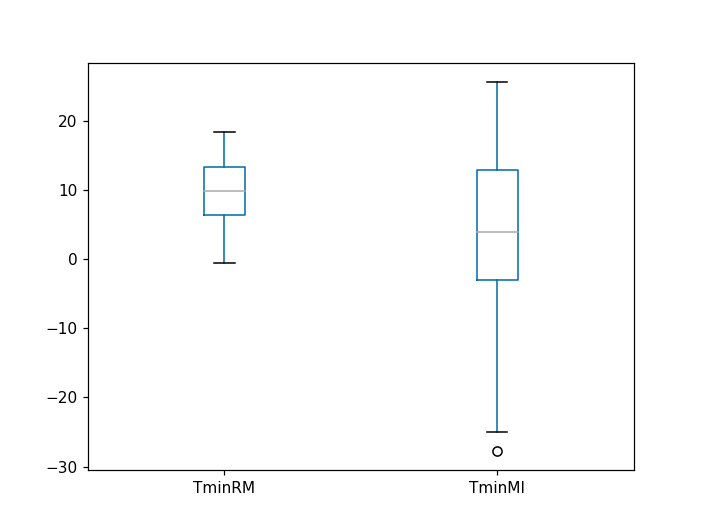

<IPython.core.display.Javascript object>


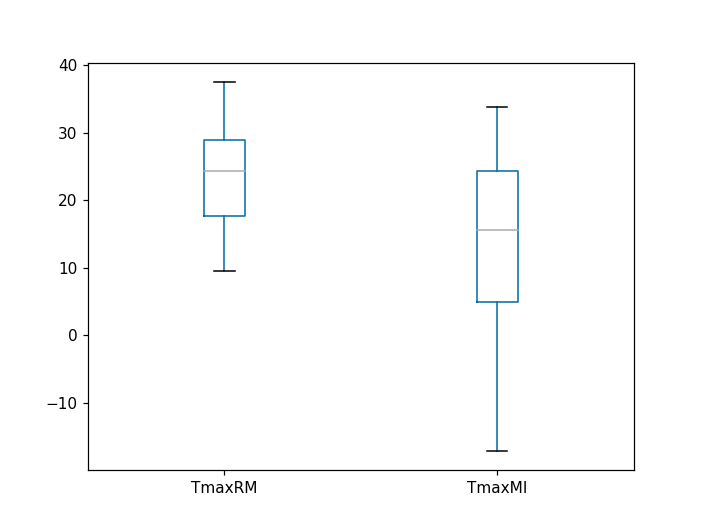

In [13]:
##merge both databases
temp = pd.merge(clTemp, usTemp, how='left', on='Date')
#pm25

temp.head
temp.describe()

temp.isnull().any()

temp[temp['TminMI'].isnull()]

temp.fillna(method ='ffill', inplace = True) 
temp.isnull().any()

temp[['TminRM','TminMI']].plot.box()
plt.show()

temp[['TmaxRM','TmaxMI']].plot.box()
plt.show()

<IPython.core.display.Javascript object>


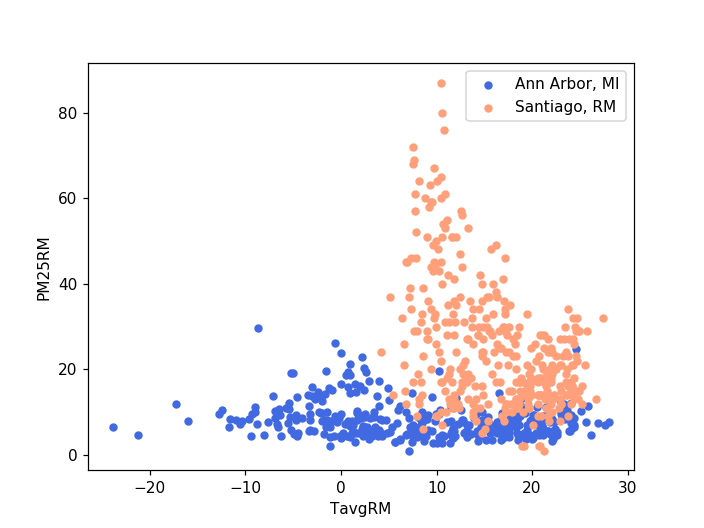

In [15]:
#dispersionDate
RM = pm25[['PM25RM']]
#RM.columns=['PM25']
RM2 = temp[['TavgRM']]
#RM2.columns=['TempAvg']
RM = pd.merge(RM, RM2, how='inner', on='Date')
RM['Label']='Santiago'
#RM = RM.reset_index()

MI = pm25[['PM25MI']] 
#MI.columns=['PM25']
MI2 = temp[['TavgMI']]
#MI2.columns=['TempAvg']
MI = pd.merge(MI, MI2, how='inner', on='Date')
MI['Label']='Ann Arbor'
#MI = MI.reset_index()

Dis = pd.merge(MI, RM, how='inner', on='Date')
Dis.describe()

m2 = Dis.plot(y='PM25MI', x='TavgMI', kind = 'scatter', label='Ann Arbor, MI', color='royalblue');
Dis.plot(y='PM25RM', x='TavgRM', kind = 'scatter', label='Santiago, RM', ax=m2, color='lightsalmon');

#MI.plot('PM25','TempAvg', kind = 'scatter')
#Dis.plot('TempAvg','PM25', kind = 'scatter', c='Label')


plt.show()

In [16]:
Dis.head()

,PM25MI,TavgMI,Label_x,PM25RM,TavgRM,Label_y
Date,,,,,,
2019-01-01,6.7,2.265854,Ann Arbor,23.0,23.799274,Santiago
2019-01-02,8.2,-1.725532,Ann Arbor,21.0,24.181487,Santiago
2019-01-03,8.6,-0.217647,Ann Arbor,29.0,24.870946,Santiago
2019-01-04,3.0,1.479167,Ann Arbor,30.0,23.410133,Santiago
2019-01-05,15.8,0.700000,Ann Arbor,26.0,20.332983,Santiago


In [17]:
Temp2S= clTemp.reset_index()
Temp2S.columns=['Date','Tmin','Tavg','Tmax']
Temp2S['city'] = 'Santiago, RM'
RM = pm25[['PM25RM']]
RM.columns=['PM25']
RM = pd.merge(RM, Temp2S, how='inner', on='Date')

Temp2A= usTemp.reset_index()
Temp2A.columns=['Date','Tmin','Tavg','Tmax']
Temp2A['city'] = 'Ann Arbor, MI'
MI = pm25[['PM25MI']]
MI.columns=['PM25']
MI = pd.merge(MI, Temp2A, how='inner', on='Date')

consdata = pd.concat([MI,RM])
consdata

,Date,PM25,Tmin,Tavg,Tmax,city
0,2019-01-01,6.7,-1.1000,2.265854,8.0000,"Ann Arbor, MI"
1,2019-01-02,8.2,-3.3000,-1.725532,0.6000,"Ann Arbor, MI"
2,2019-01-03,8.6,-1.7000,-0.217647,2.8000,"Ann Arbor, MI"
3,2019-01-04,3.0,-2.2000,1.479167,8.9000,"Ann Arbor, MI"
4,2019-01-05,15.8,-4.4000,0.700000,10.0000,"Ann Arbor, MI"
...,...,...,...,...,...,...
360,2019-12-27,15.0,15.4178,24.038512,31.9750,"Santiago, RM"
361,2019-12-28,16.0,15.5920,25.198242,34.0808,"Santiago, RM"
362,2019-12-29,12.0,17.1166,25.244975,32.9833,"Santiago, RM"
363,2019-12-30,13.0,15.8275,24.813425,33.3000,"Santiago, RM"


<IPython.core.display.Javascript object>


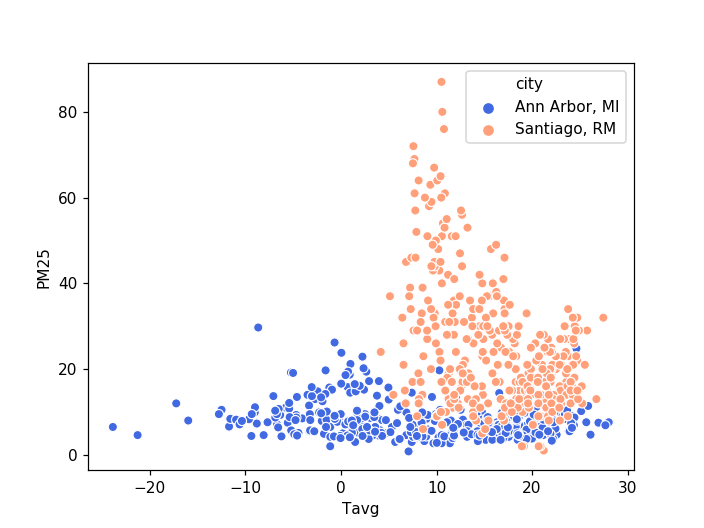

In [18]:
#Last graphs
plt.figure()
g =sns.scatterplot(x="Tavg", y="PM25", hue="city", data=consdata, palette=['royalblue','lightsalmon'], legend='full')
plt.show()

<IPython.core.display.Javascript object>


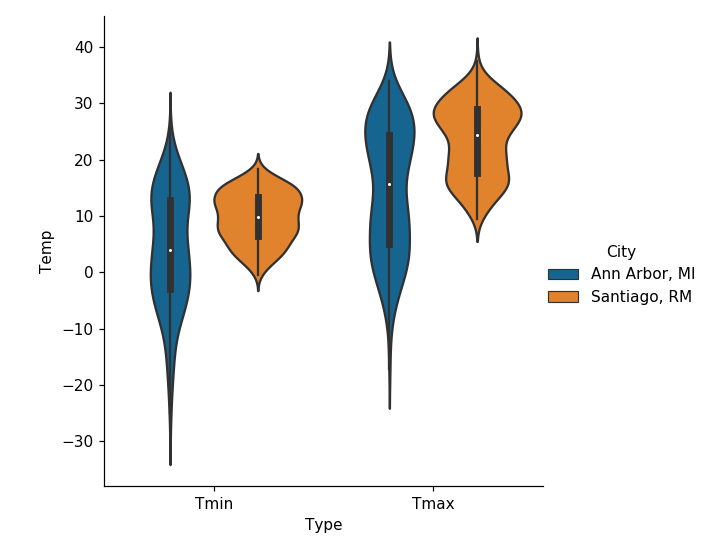

In [20]:
#box plot of temperature
consdata
#plt.figure()

consdata2=consdata[['Tmin','Tmax','city']]
consdata2 = consdata2.set_index(['city'])
consdata2
b =consdata2.unstack()
b = b.reset_index()
b.columns=['Type','City','Temp']


g = sns.catplot(x="Type", y="Temp", hue="City", data=b, kind="violin")#, height=4, aspect=.7);

#g =sns.scatterplot(x="Tavg", y="PM25", hue="city", data=consdata, palette=['royalblue','lightsalmon'], legend='full')
plt.show()

<IPython.core.display.Javascript object>


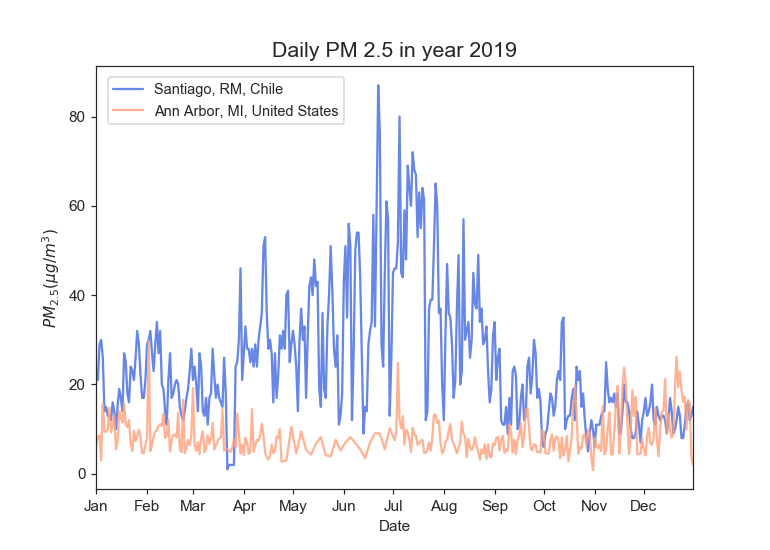

In [22]:
import datetime as dt

%matplotlib notebook
sns.set_style("ticks")

plt.figure(figsize=(7,5))

#fig, ax = plt.subplots()
g = sns.lineplot(x='Date', y='PM25', hue="loc", data=pm25_2, legend=False, palette=['royalblue','lightsalmon'], alpha=0.8)
plt.legend(loc='upper left', labels=['Santiago, RM, Chile', 'Ann Arbor, MI, United States'], fontsize=9.5,
           bbox_to_anchor=(0.007, 0.99));
plt.ylabel(r'$PM_{2.5}(\mu g / m^3)$');
plt.xlabel('Date');
plt.title("Daily PM 2.5 in year 2019", size=14);

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%b')); 
# Limit of x-axis
plt.gca().set_xlim([dt.date(2019, 1, 1), dt.date(2019, 12, 31)]);

#plt.savefig("violin_plot_with_Seaborn_Python.png")
plt.show()

<IPython.core.display.Javascript object>


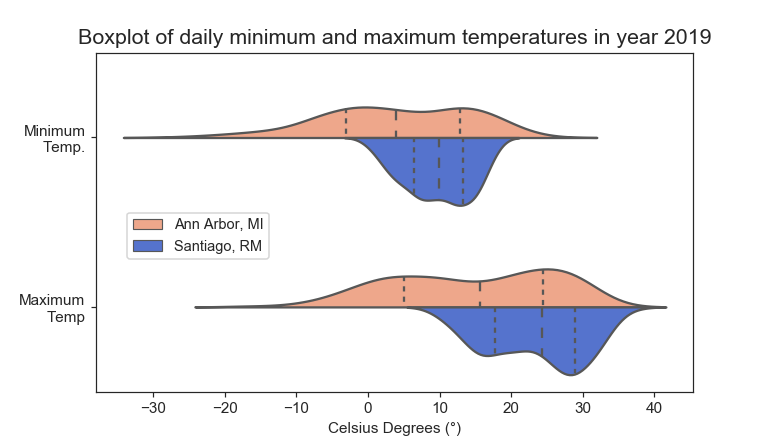

In [24]:
plt.figure(figsize=(7,4))
j = sns.violinplot(x="Temp", y="Type", hue="City", data=b, palette=['lightsalmon','royalblue'], 
                   alpha=0.8, split=True, inner='quartile');

#"Type", y="Temp", hue="City", data=b, kind="violin"

plt.legend(loc='upper left',fontsize=9.5, bbox_to_anchor=(0.04, 0.55));
plt.xlabel('Celsius Degrees (°)');
plt.ylabel('');
plt.title('Boxplot of daily minimum and maximum temperatures in year 2019', size=14);

label = ['Minimum\nTemp.','Maximum\nTemp']
plt.gca().set_yticklabels(label)

plt.show()